In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

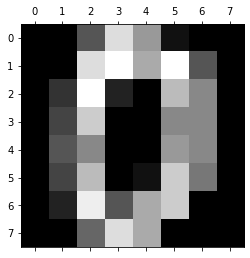

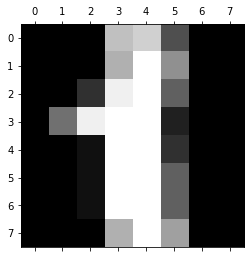

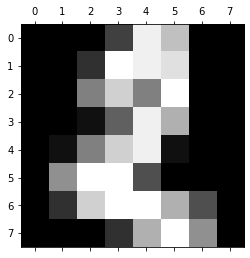

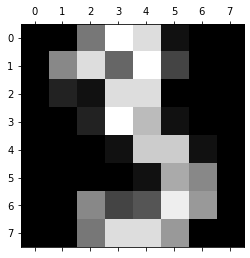

In [4]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Train the model and prediction

In [6]:
X = df.drop('target',axis='columns')
y = df.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model.score(X_test, y_test)

0.9805555555555555

In [18]:
y_predicted = model.predict(X_test)
print(y_predicted)
print(y_test)

[2 2 2 7 8 3 2 9 9 0 2 8 6 2 6 7 6 0 6 8 3 1 1 4 3 8 8 6 2 7 9 9 2 5 1 8 0
 6 8 4 5 4 3 3 5 3 0 9 6 6 2 7 3 8 7 8 7 5 1 2 0 3 7 9 7 3 0 1 2 6 9 8 2 0
 0 6 6 5 7 1 4 1 7 2 8 8 5 6 2 9 9 3 8 5 7 8 4 6 6 6 5 9 5 2 7 4 3 8 5 5 6
 8 6 1 3 2 4 0 3 2 3 1 1 3 9 3 5 6 4 7 8 8 9 3 7 0 1 4 8 2 8 8 3 1 1 7 7 0
 7 7 5 0 4 8 6 9 3 6 3 5 2 6 5 6 7 7 9 4 9 1 2 5 7 2 0 8 7 3 2 0 7 1 9 1 9
 5 3 4 2 2 2 1 5 2 0 3 1 1 8 8 1 0 4 3 2 9 5 9 1 8 4 8 1 2 6 9 5 2 2 4 7 5
 4 3 9 3 5 4 7 0 1 0 5 3 3 9 8 0 1 7 0 7 3 1 9 1 9 4 0 1 9 3 6 4 4 6 2 4 7
 1 4 2 9 6 7 9 6 1 7 4 1 5 6 4 9 6 9 0 3 5 9 0 2 0 8 2 2 6 1 3 9 7 0 7 8 1
 6 2 1 7 2 4 9 3 9 6 5 3 5 9 5 3 1 6 9 6 2 5 5 2 1 8 2 0 3 7 2 8 7 0 9 9 6
 4 3 6 0 1 9 9 3 3 2 2 4 1 7 0 8 9 5 2 1 5 8 0 5 7 5 3]
372     2
1499    2
891     2
1019    7
1455    8
       ..
642     0
625     5
325     9
1659    5
578     3
Name: target, Length: 360, dtype: int32


### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  2,  1, 40]], dtype=int64)

Text(69.0, 0.5, 'Truth')

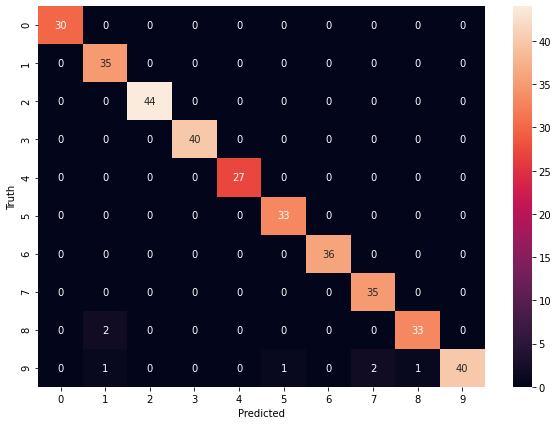

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exercise

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
model.score(X_test,y_test)

0.9333333333333333

In [27]:

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9333333333333333